# Assignment 1 - Concrete Data
By Muhammad Danial Bin Zulkifli (U2003961/1) Group 2

## Download the Data

In [76]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

concrete = pd.read_excel('Concrete_Data.xls')


## A Quick Look at the Data Structure

In [77]:
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [78]:
#change column name
concrete.columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']


In [79]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [80]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


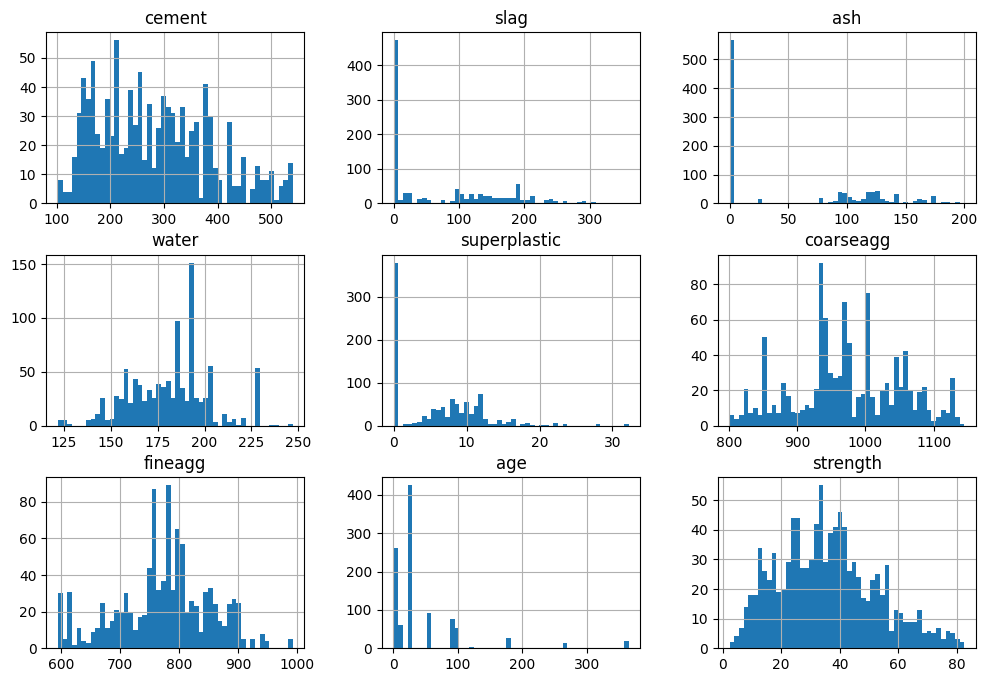

In [81]:
concrete.hist(bins=50, figsize=(12, 8))
plt.show()

In [82]:
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

## Create a Test Set

In [83]:
concrete["strengthy"] = pd.cut(concrete["strength"],
bins=[0, 20.0, 40.0, 60.0, np.inf],
labels=[1, 2, 3, 4])

from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
concrete, test_size=0.15, stratify=concrete["strengthy"], random_state=42)

for set_ in (strat_train_set, strat_test_set):
    set_.drop("strengthy", axis=1, inplace=True)

In [84]:
strat_test_set.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
666,192.00,288.0,0.00,192.00,0.00,929.8,716.1,3,12.788401
628,200.00,0.0,0.00,180.00,0.00,1125.0,845.0,28,12.245094
107,323.70,282.8,0.00,183.80,10.30,942.7,659.9,7,49.800851
285,181.38,0.0,167.01,169.59,7.56,1055.6,777.8,14,21.601283
718,122.60,183.9,0.00,203.50,0.00,958.2,800.1,7,10.354551


## Explore and Visualise the Data to Gain Insights

### Make a copy of training set for data exploration 

In [85]:
concrete = strat_train_set.copy()

In [86]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
362,218.23,54.64,123.78,140.75,11.91,1075.7,792.67,56,61.990787
233,213.72,98.05,24.51,181.71,6.86,1065.8,785.38,100,53.903234
289,182.04,45.21,121.97,170.21,8.19,1059.4,780.65,3,7.315340
737,238.00,0.00,0.00,186.00,0.00,1119.0,789.00,28,17.540269
139,374.00,189.20,0.00,170.10,10.10,926.1,756.70,56,63.397318


### Look for correlation 

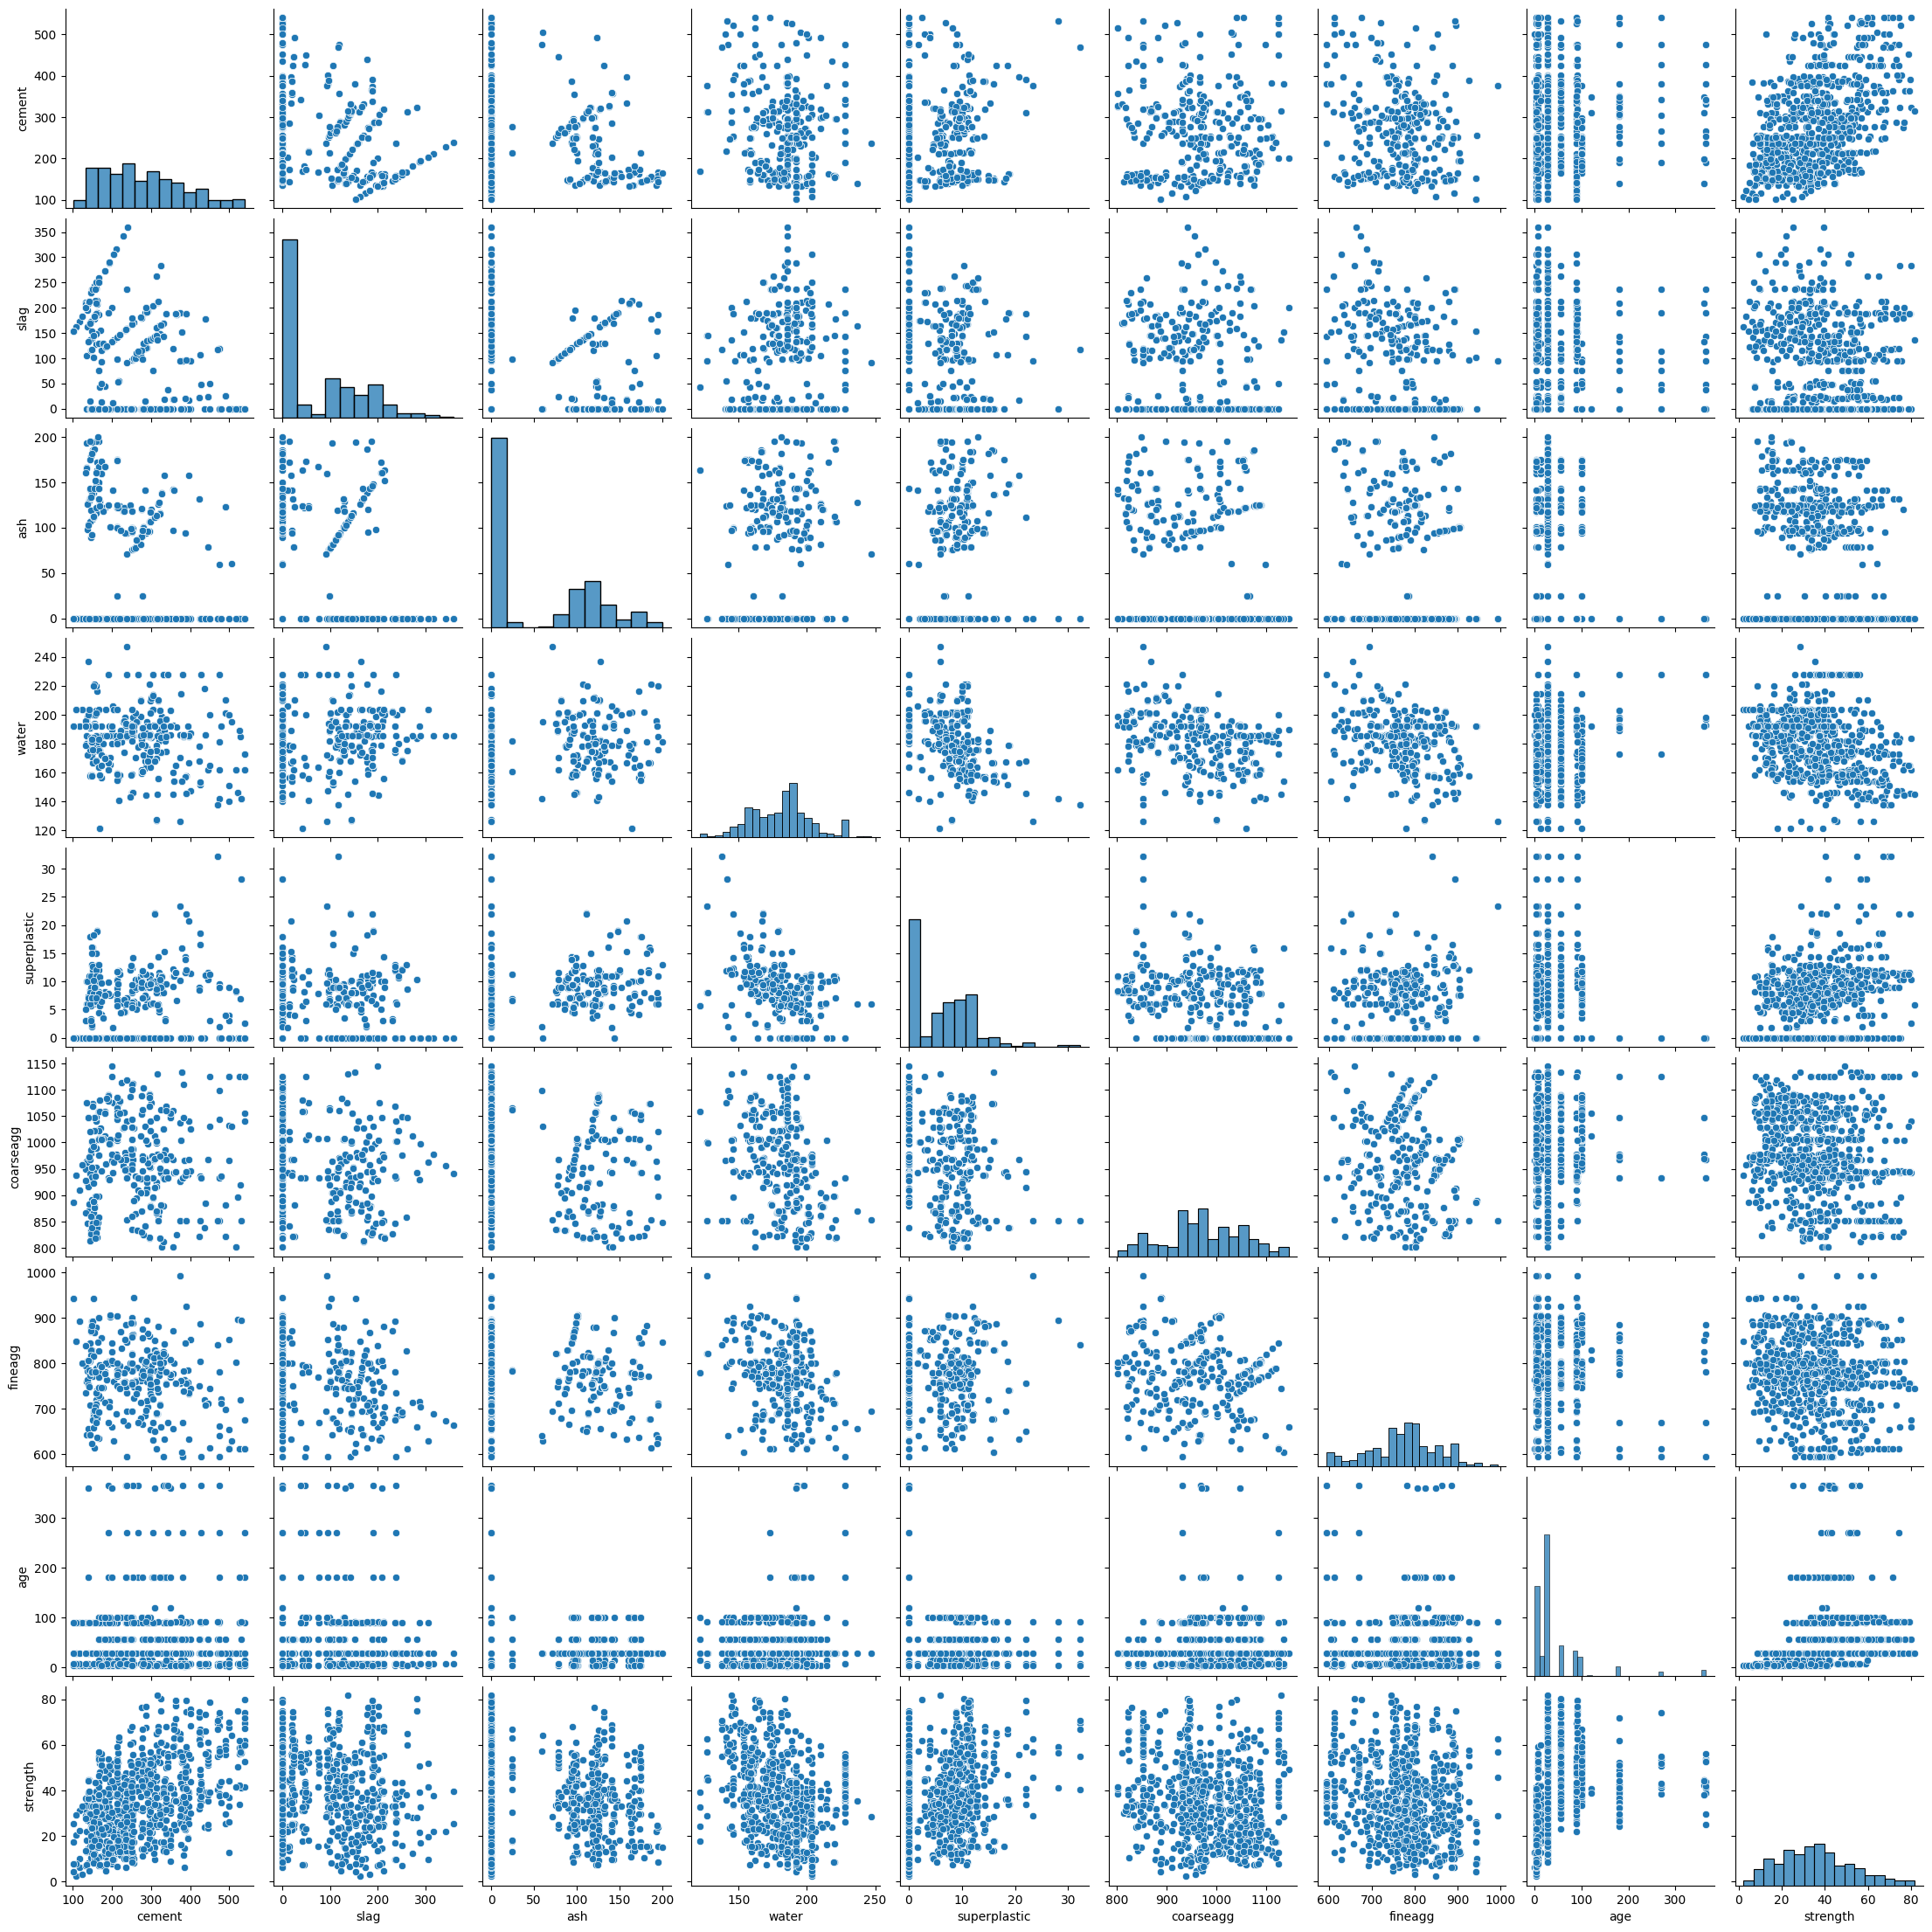

In [87]:
import seaborn as sns
sns.pairplot(concrete)
plt.show()


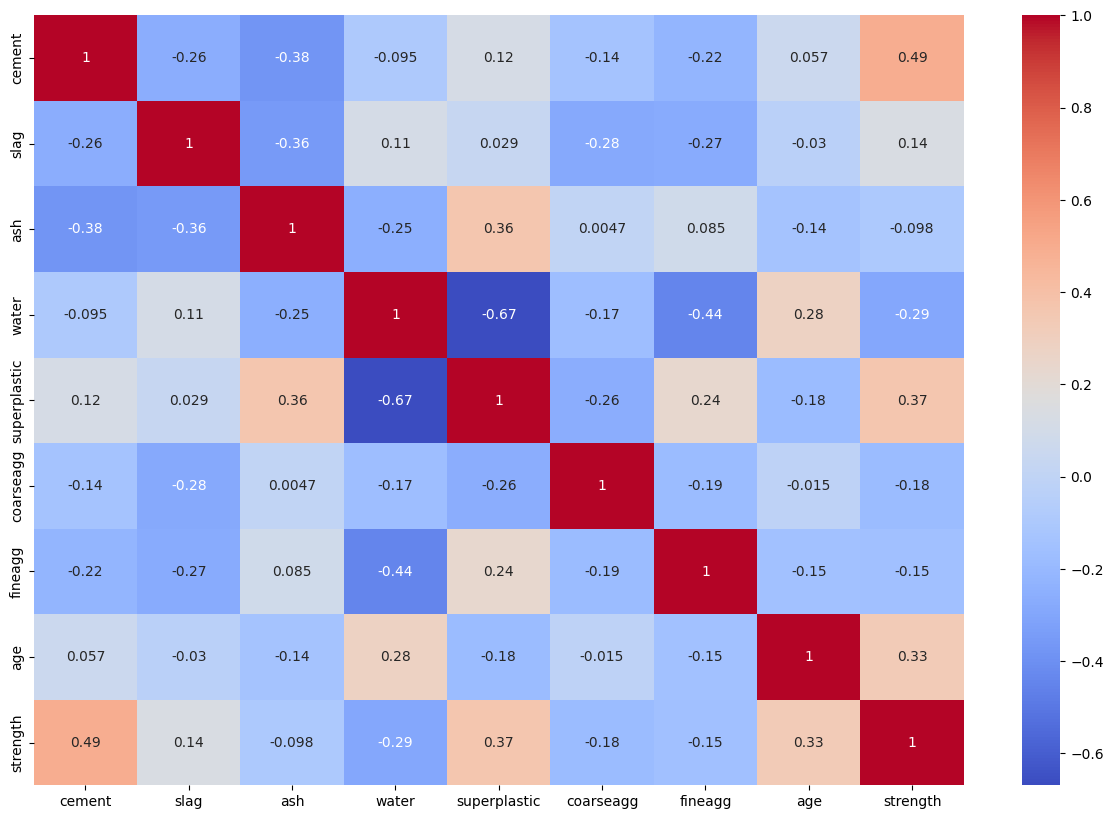

In [88]:
corr_matrix = concrete.corr(numeric_only=True)
corr_matrix["strength"].sort_values(ascending=False)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Look into more details on the median income vs median house value

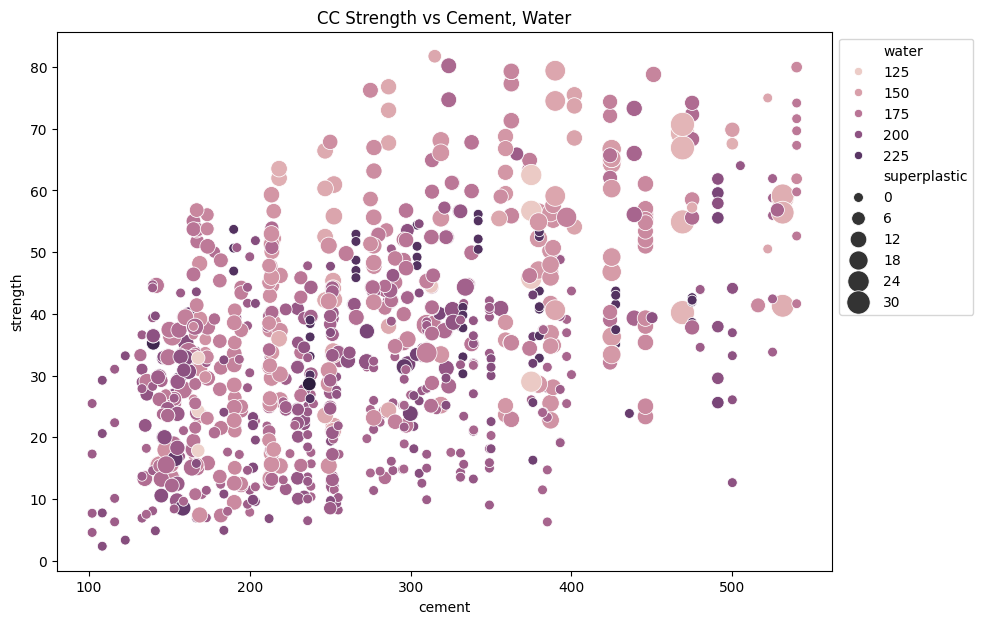

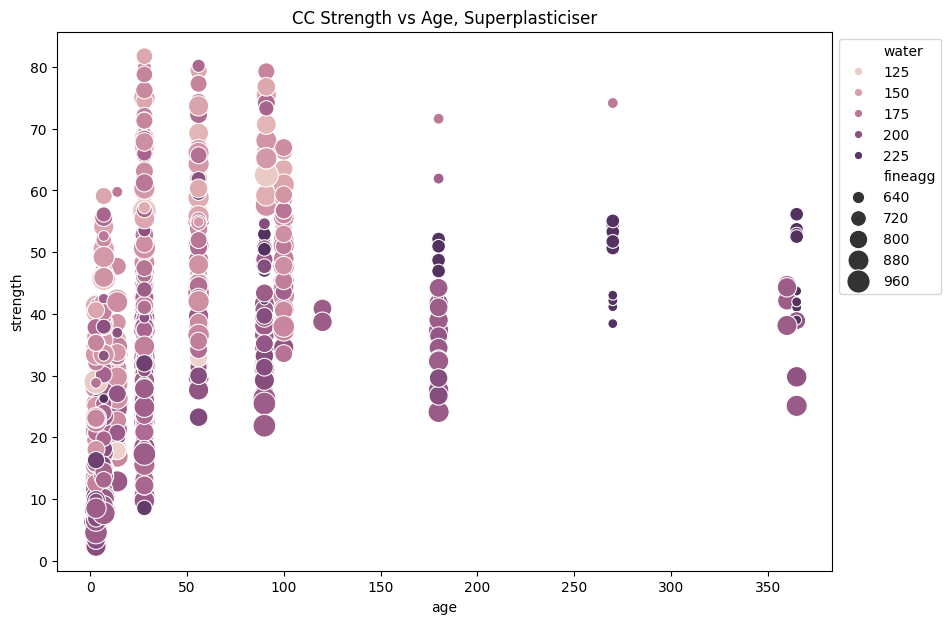

In [89]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="cement", hue="water", size= "superplastic", 
                data=concrete, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs Cement, Water")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="age", hue="water", size = "fineagg", 
                data=concrete, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs Age, Superplasticiser")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

CC Strength increases, water decreases, superplasticzer increases

CC Srength increases, age decreases

age increases, water needed is increases to get more cc strength

### Experiment with Attribute Combinations

In [90]:
concrete["cement_water"] = concrete["cement"] / concrete["water"]
concrete["superplastic_water"] = concrete["superplastic"] / concrete["water"]
concrete["age_water"] = concrete["age"] / concrete["water"]
concrete["fineagg_water"] = concrete["fineagg"] / concrete["water"]

### Compare with previous correlation matrix

In [91]:
corr_matrix = concrete.corr(numeric_only=True)
corr_matrix["strength"].sort_values(ascending=False)

strength              1.000000
cement_water          0.554364
cement                0.493710
age_water             0.389306
superplastic_water    0.378130
superplastic          0.367267
age                   0.329200
fineagg_water         0.137734
slag                  0.135618
ash                  -0.098393
fineagg              -0.154906
coarseagg            -0.183479
water                -0.294820
Name: strength, dtype: float64

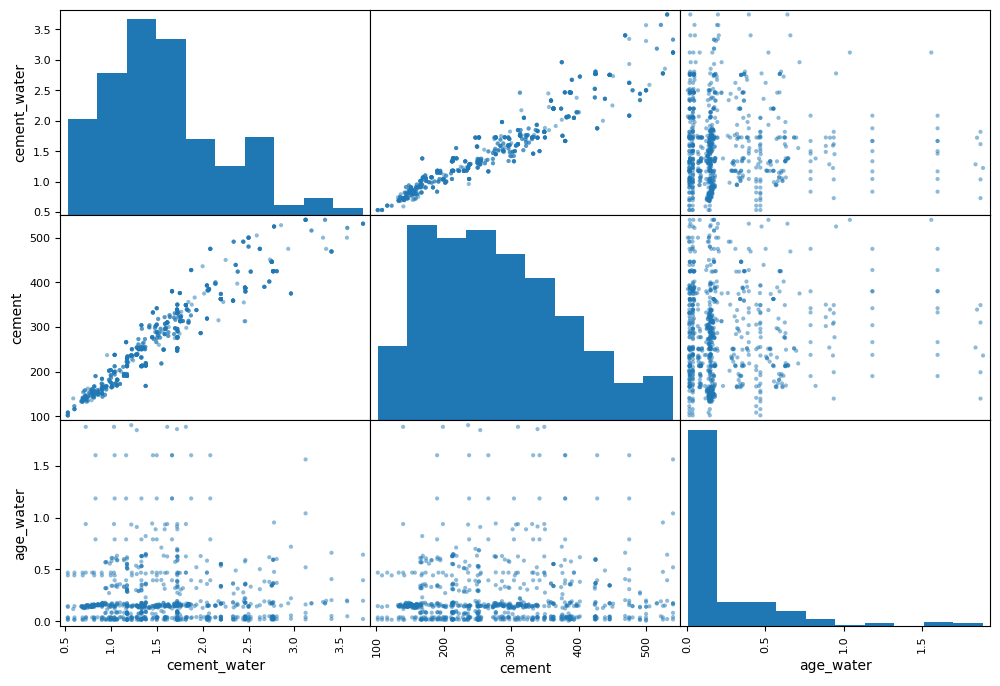

In [92]:
from pandas.plotting import scatter_matrix
attributes = [ "cement_water", "cement", "age_water"]
scatter_matrix(concrete[attributes], figsize=(12, 8))
plt.show()

## Prepare the Data for Machine Learning Algorithms

### Split the features and target - get the target into its own dataframe

In [93]:
concrete = strat_train_set.drop("strength", axis=1)
concrete_labels = strat_train_set["strength"].copy()

In [94]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
362,218.23,54.64,123.78,140.75,11.91,1075.7,792.67,56
233,213.72,98.05,24.51,181.71,6.86,1065.8,785.38,100
289,182.04,45.21,121.97,170.21,8.19,1059.4,780.65,3
737,238.00,0.00,0.00,186.00,0.00,1119.0,789.00,28
139,374.00,189.20,0.00,170.10,10.10,926.1,756.70,56


In [95]:
concrete_labels.head()

362    61.990787
233    53.903234
289     7.315340
737    17.540269
139    63.397318
Name: strength, dtype: float64

### Data cleaning

#### Look at the rows with NaN value

In [96]:
null_rows_idx = concrete.isnull().any(axis=1)
concrete.loc[null_rows_idx].head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age


In [97]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

## Feature Scaling and Transformation

### Build Pipeline

In [98]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] # feature names out

def log_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
        StandardScaler())

def cat_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore"))

def default_num_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        StandardScaler())
    
preprocessing = ColumnTransformer([
("cement_water", ratio_pipeline(),
 ["cement", "water"]),
 ("age_water", ratio_pipeline(),
 ["age", "water"]),
 ("log", log_pipeline(),
 ["cement", "water", "superplastic", "fineagg"]),
],remainder=default_num_pipeline())
# remaining col: housing_median_age

housing_prepared = preprocessing.fit_transform(concrete)
housing_prepared.shape

(875, 9)

## Select and Train a Model

housing.head()

In [99]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
362,218.23,54.64,123.78,140.75,11.91,1075.7,792.67,56
233,213.72,98.05,24.51,181.71,6.86,1065.8,785.38,100
289,182.04,45.21,121.97,170.21,8.19,1059.4,780.65,3
737,238.00,0.00,0.00,186.00,0.00,1119.0,789.00,28
139,374.00,189.20,0.00,170.10,10.10,926.1,756.70,56


In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(concrete, concrete_labels)
concrete_predictions = lin_reg.predict(concrete)
lin_rmse = mean_squared_error(concrete_labels, concrete_predictions,squared=False)

lin_rmse

c:\Users\dania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.901323990721124

### Example 2 - Decision Tree Model 

In [101]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(concrete, concrete_labels)
concrete_predictions = tree_reg.predict(concrete)
tree_rmse = mean_squared_error(concrete_labels, concrete_predictions,squared=False)

tree_rmse

c:\Users\dania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.920606779688016

### Example 3 - Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_reg.fit(concrete, concrete_labels)
housing_predictions = forest_reg.predict(concrete)
forest_rmse = mean_squared_error(concrete_labels, housing_predictions,squared=False)

forest_rmse

c:\Users\dania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.0314085819778542

### Cross Validation 

In [103]:
from sklearn.model_selection import cross_val_score

### Cross Validate Example 1

In [104]:
lin_rmses = -cross_val_score(lin_reg, concrete, concrete_labels,
scoring="neg_root_mean_squared_error", cv=10)
print("Cross-validation RMSEs (Kfold):", lin_rmses)
print("Mean:", lin_rmses.mean())

Cross-validation RMSEs (Kfold): [10.98119705  9.43062432  9.9105226   9.4939674   9.48025498 10.54156651
 10.19910391  8.86058674  9.89249137 11.32818057]
Mean: 10.011849544101992


### Cross Validate Example 2

In [105]:
tree_rmses = -cross_val_score(tree_reg, concrete, concrete_labels,
scoring="neg_root_mean_squared_error", cv=10)
print("Cross-validation RMSEs (Kfold):", tree_rmses.mean())
print("Mean:", tree_rmses.mean())

Cross-validation RMSEs (Kfold): 6.638941906141537
Mean: 6.638941906141537


### Cross Validate Example 3

In [106]:
forest_rmses = -cross_val_score(forest_reg, concrete, concrete_labels,
scoring="neg_root_mean_squared_error", cv=10)
print("Cross-validation RMSEs (Kfold):", forest_rmses.mean())

Cross-validation RMSEs (Kfold): 5.1655086457549935


## Model Fine-tuning

In [107]:
from sklearn.pipeline import Pipeline
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

### Option 1 (Grid Search)

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'random_forest__max_features': [2,4,6,8,10,12,14,16]}
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
scoring='neg_root_mean_squared_error')

grid_search.fit(concrete, concrete_labels)
final_model = grid_search.best_estimator_

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
best_hyperparameters_grid = grid_search.best_params_
best_max_features = best_hyperparameters_grid['random_forest__max_features']


feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
       reverse=True)

[(0.43488673889891305, 'age_water__ratio'),
 (0.21207136034410806, 'cement_water__ratio'),
 (0.10252755661497995, 'log__cement'),
 (0.05226666720648145, 'remainder__slag'),
 (0.04860179079548339, 'log__water'),
 (0.04845608420794533, 'log__superplastic'),
 (0.045310382607353185, 'log__fineagg'),
 (0.03498547167428484, 'remainder__coarseagg'),
 (0.020893947650450776, 'remainder__ash')]

### Option 2 (Randomised Search)

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(concrete, concrete_labels)
final_model2 = rnd_search.best_estimator_

cv_res2 = pd.DataFrame(rnd_search.cv_results_)
cv_res2.sort_values(by="mean_test_score", ascending=False, inplace=True)
best_hyperparameters_rnd = rnd_search.best_params_
best_max_features = best_hyperparameters_rnd['random_forest__max_features']


feature_importances = final_model2["random_forest"].feature_importances_
feature_importances.round(2)

sorted(zip(feature_importances,
           final_model2["preprocessing"].get_feature_names_out()),
       reverse=True)

[(0.449435017971098, 'age_water__ratio'),
 (0.22057918150618364, 'cement_water__ratio'),
 (0.1072048323684825, 'log__cement'),
 (0.05866177408859303, 'remainder__slag'),
 (0.04114782424311172, 'log__water'),
 (0.039732646977352, 'log__superplastic'),
 (0.03876660183062856, 'log__fineagg'),
 (0.027862939226582933, 'remainder__coarseagg'),
 (0.016609181787967765, 'remainder__ash')]

### Evaluate Model on Test Set

In [115]:
print("Random Forest Grid")
X_test = strat_test_set.drop("strength", axis=1)
y_test = strat_test_set["strength"].copy()
final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

Random Forest Grid
3.7884011156215167


c:\Users\dania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [111]:
print("Random Forest Randomized")
X_test = strat_test_set.drop("strength", axis=1)
y_test = strat_test_set["strength"].copy()
final_predictions = final_model2.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

Random Forest Randomized
3.974520424808947


c:\Users\dania\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Random Forest Grid will be used as final model prediction

In [116]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([3.12703445, 4.35035879])